# Data Science Python Workshop

This workshop will cover an intermediate level of Python with an emphasis on machine learning. It will follow a standard format for a data science project, which is what upper year data science courses use.

Standard Data Science Project Outline
- Define the Problem
- Exploratory Data Analysis (EDA)
- Data Preprocessing/Feature Engineering
- Model Fitting
- Model Evaluation

Usually there is a model validation component as well. However, for the sake of time, this was exclude from this tutorial.

For this tutorial we are going to look at an dataset containing a bunch of demographic variables and the income level of individuals. As you will see when we define the problem, we are going to treat this as a classification problem. To solve this classification problem that we will define, we will apply standard data science techniques to explore and preprocess the data, then fit a decision tree classifier to evaluate how well we can predict income level. Additonally, we will break down the basics of a decision tree classifier.

The dataset used in this notebook contains 32,561 rows and 15 columns, covering demographic variables and the income level of individuals. The columns are as follows:

| Column          | Meaning                                                                 |
|-----------------|-------------------------------------------------------------------------|
| age             | Age of the individual.                                                  |
| workclass       | The work class (e.g., State-gov, Private).                |
| fnlwgt          | Final weight, the number of people the census believes the entry represents. |
| education       | The highest level of education achieved.                  |
| education-num   | The highest level of education in numerical form.             |
| marital-status  | Marital status.                                           |
| occupation      | Job occupation.                                           |
| relationship    | Relationship status.                                      |
| race            | Race.                                                     |
| sex             | Gender.                                                   |
| capital-gain    | Capital gains recorded.                                       |
| capital-loss    | Capital losses recorded.                                      |
| hours-per-week  | Hours worked per week.                                        |
| native-country  | Country of origin.                                        |
| income          | Income level, the target variable (<=50K or >50K).        |


If you would like to know more information about the data set, please follow this link to [Kaggle](https://www.kaggle.com/datasets/lodetomasi1995/income-classification/data).

## 1. Define the Problem

This section of the workshop focuses on a dataset containing demographic information and the income level of individuals. The primary goal is to predict the income level (>50K or <=50K) based on various demographic factors using a classification approach. This problem is fundamental in understanding how different factors influence economic status, serving as a crucial application of machine learning in socioeconomic studies.

## 2. Exploratory Data Analysis

### 2.1 Import Libraries and Dataset

In [1]:
# Import libraries for data manipulation
import pandas as pd
import numpy as np

# Import libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz 
%matplotlib inline

# Import libraries for data modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Read in the income dataset
df = pd.read_csv('https://raw.githubusercontent.com/michaelritacco/Data-Science-Python-Workshop/main/income_dataset.csv')

### 2.2  Preview the Dataset

Starting our EDA, we first get acquainted with the dataset's basic properties. This includes understanding its size, structure, and the types of data it contains. It sets the foundation for more in-depth analysis.

In [2]:
# Display the first 5 rows
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# Display the shape of the dataset
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset contains 32561 rows and 15 columns.


In [4]:
# Get the columns in the data frame
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

### 2.3 Standardize Column Names 

To ensure the column names are easy to work with, we standardize them by replacing spaces with underscores.

In [5]:
# Standardize column names
df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.replace('-', '_')
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

### 2.4 Summary Info and Data Types

Next, we get an overview of the columns, their data types, and identify which are categorical versus numerical. This helps us plan our analysis and visualization strategies.

In [6]:
# Show the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
# Display data types of each column
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

### 2.5 Check for Missing Values and Duplicates

Identifying missing values and duplicates is key in preparing our dataset for modeling. Missing data can significantly impact the performance of machine learning algorithms, and deciding how to handle these values is an important step.

In [8]:
# Check for missing values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

From this there appears to be no missing values in the dataset.

In [9]:
# Check for duplicates
df[df.duplicated()].head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K


In [10]:
# Get the number of duplicate values
print(f'There are {df.duplicated().sum()} duplicates in the dataset')

There are 24 duplicates in the dataset


In [11]:
# Remove the duplicate observations
df.drop_duplicates(inplace=True)

### 2.6 Numeric Variable Exploration

In this section, we examine the statistical summary of our numerical features, providing insights into the central tendency, dispersion, and shape of the dataset's distributions. This analysis is crucial for identifying outliers and understanding the data's scale. Following this, we visualize the distributions through histograms to capture the essence of these statistical properties visually. Box plots segmented by the target variable 'income' then offer a comparative view, highlighting how different income groups vary across numerical features.

In [12]:
# Descriptive statistics for numerical features
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


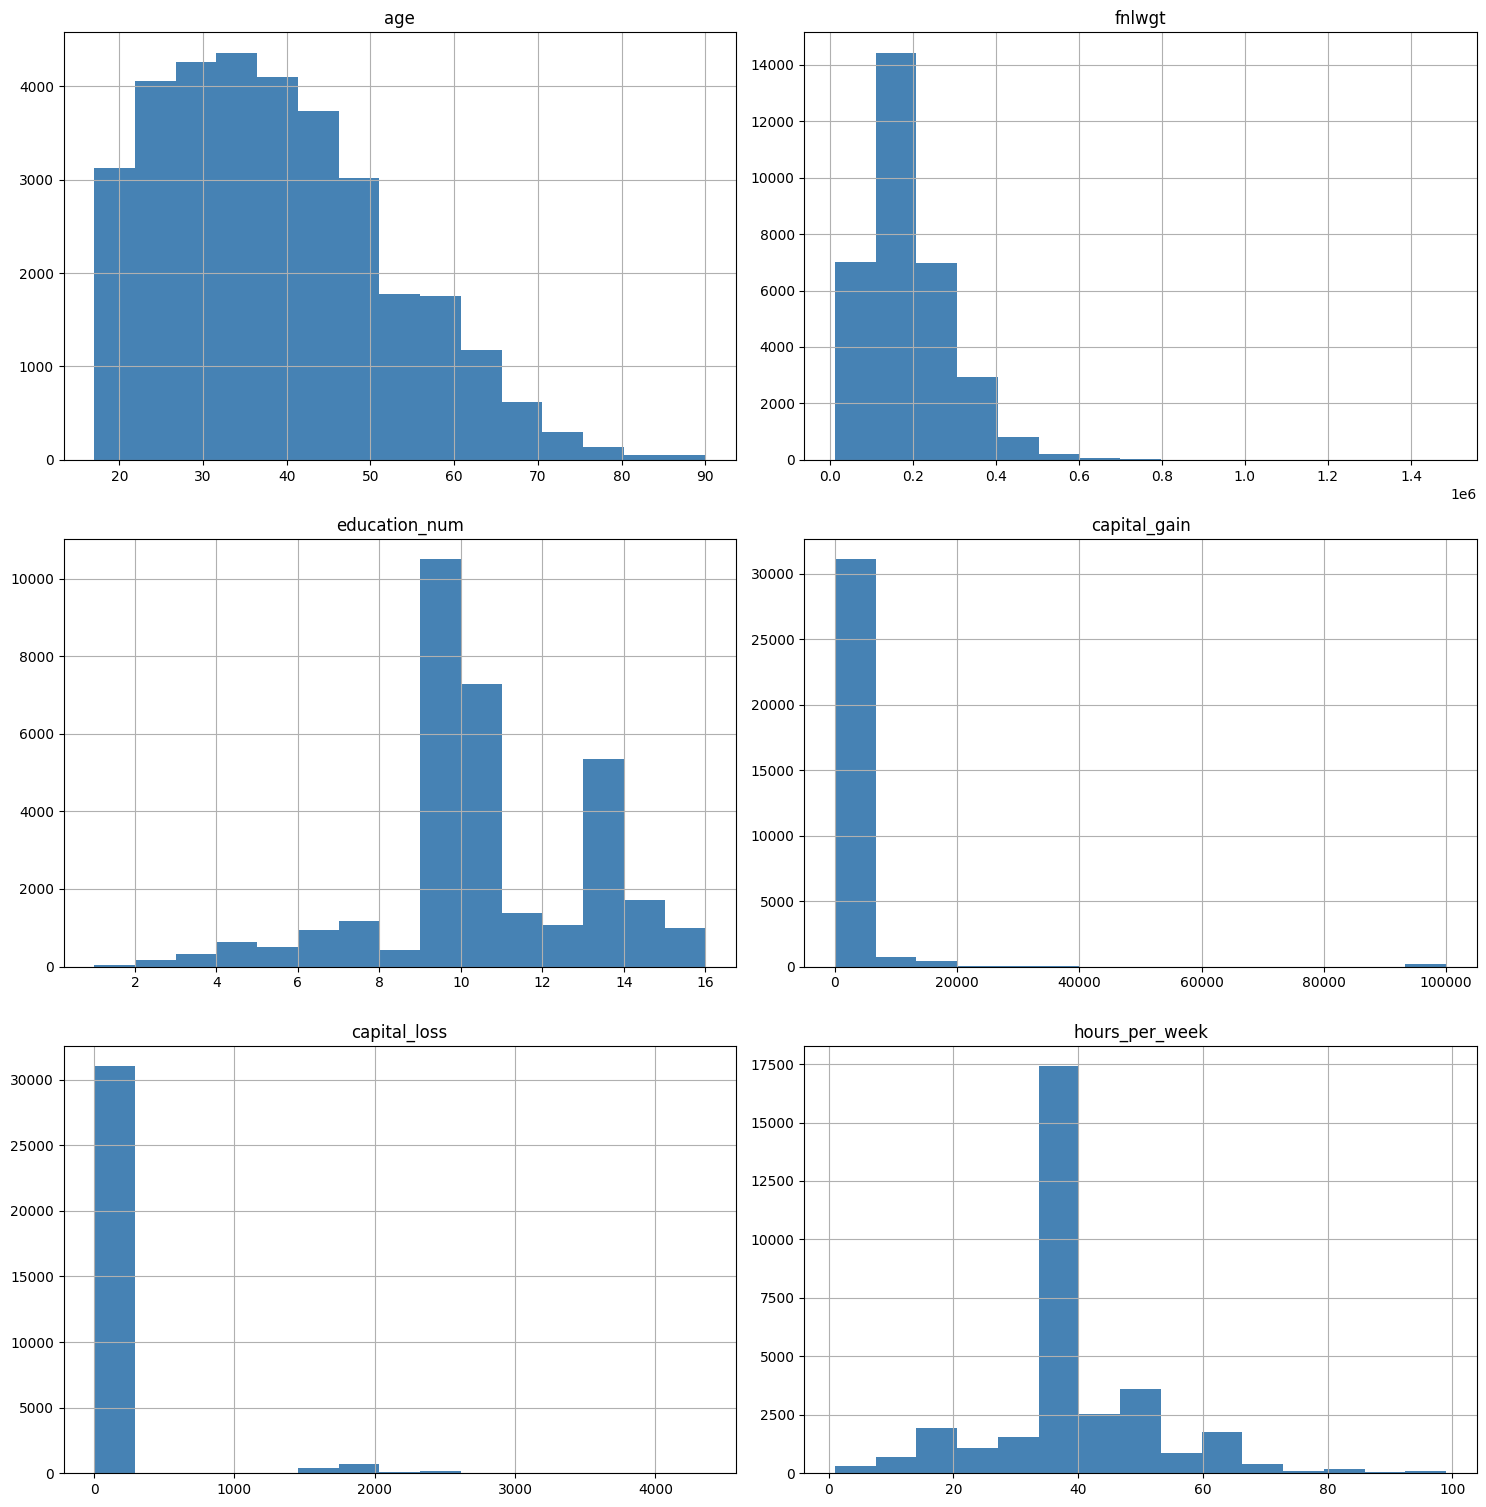

In [13]:
# Plot histograms for numerical variables to visualize distributions
numerical_features = df.select_dtypes(exclude=['object']).columns
df[numerical_features].hist(bins=15, figsize=(15, 20), layout=(4, 2), color='steelblue')
plt.tight_layout()
plt.show()

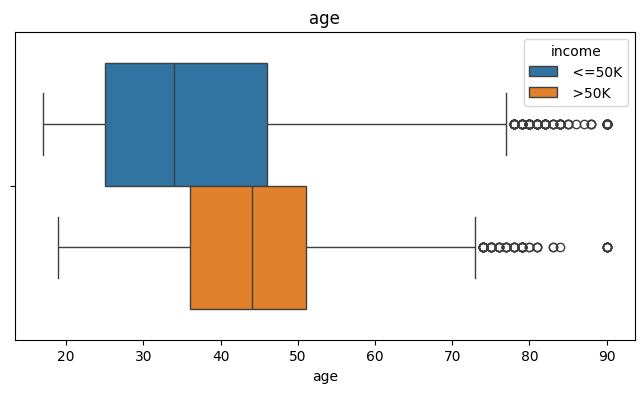

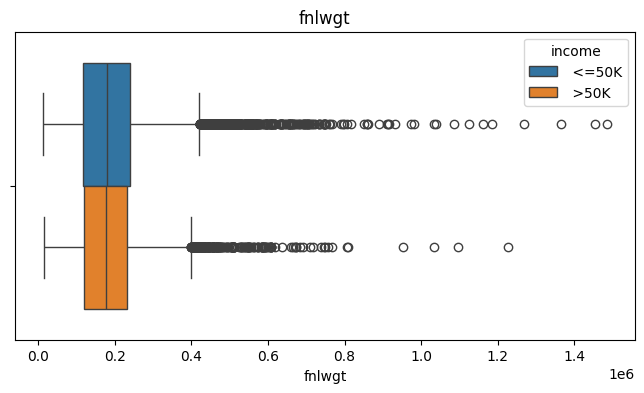

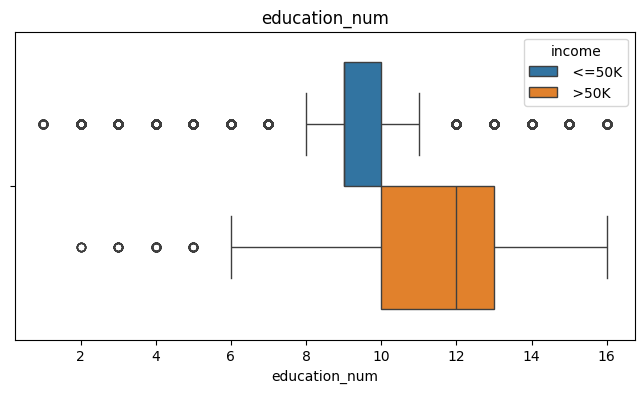

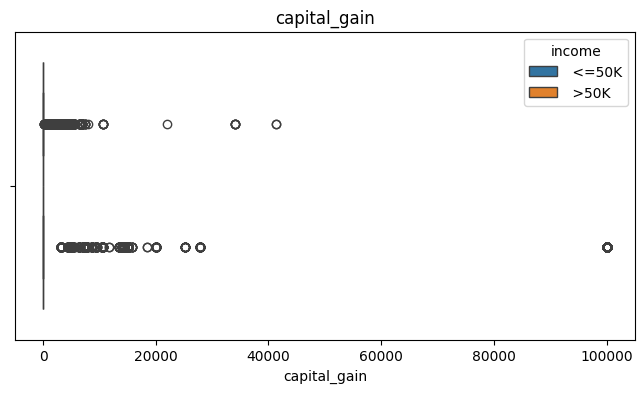

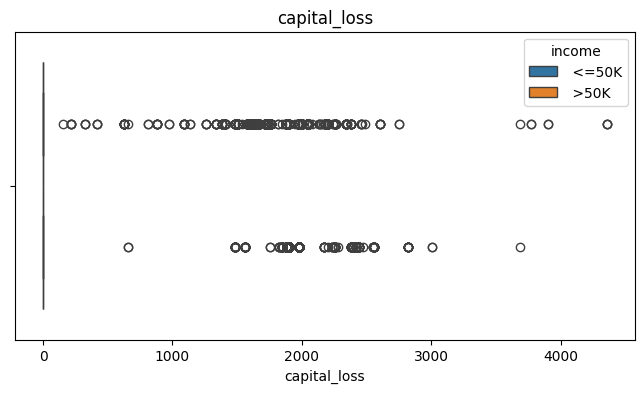

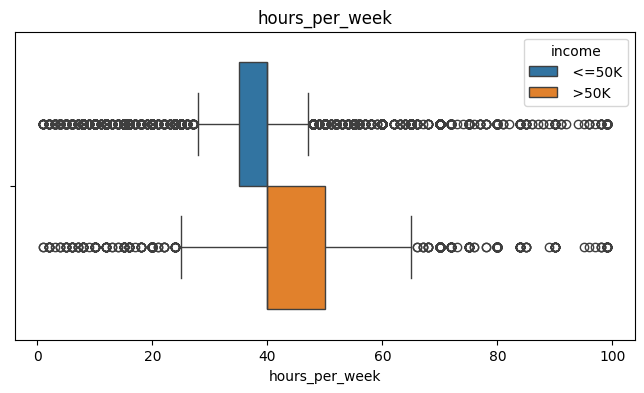

In [14]:
# Generate box plots for numerical variables by income to observe distribution differences
for column in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=column, hue='income', data=df)
    plt.title(f"{column}")
    plt.show()

Boxplots can be really useful tool for detecting outliers. However, the way outliers are typically handled in tree-based models can be quite complicated, so there will be no outlier detection in this tutorial. Additonally, since trees do not depend on any paramters or statistical distributions, they are quite good at handling outliers or significant skew in the data. Therefore, no scaling or outlier removal will be conducted.

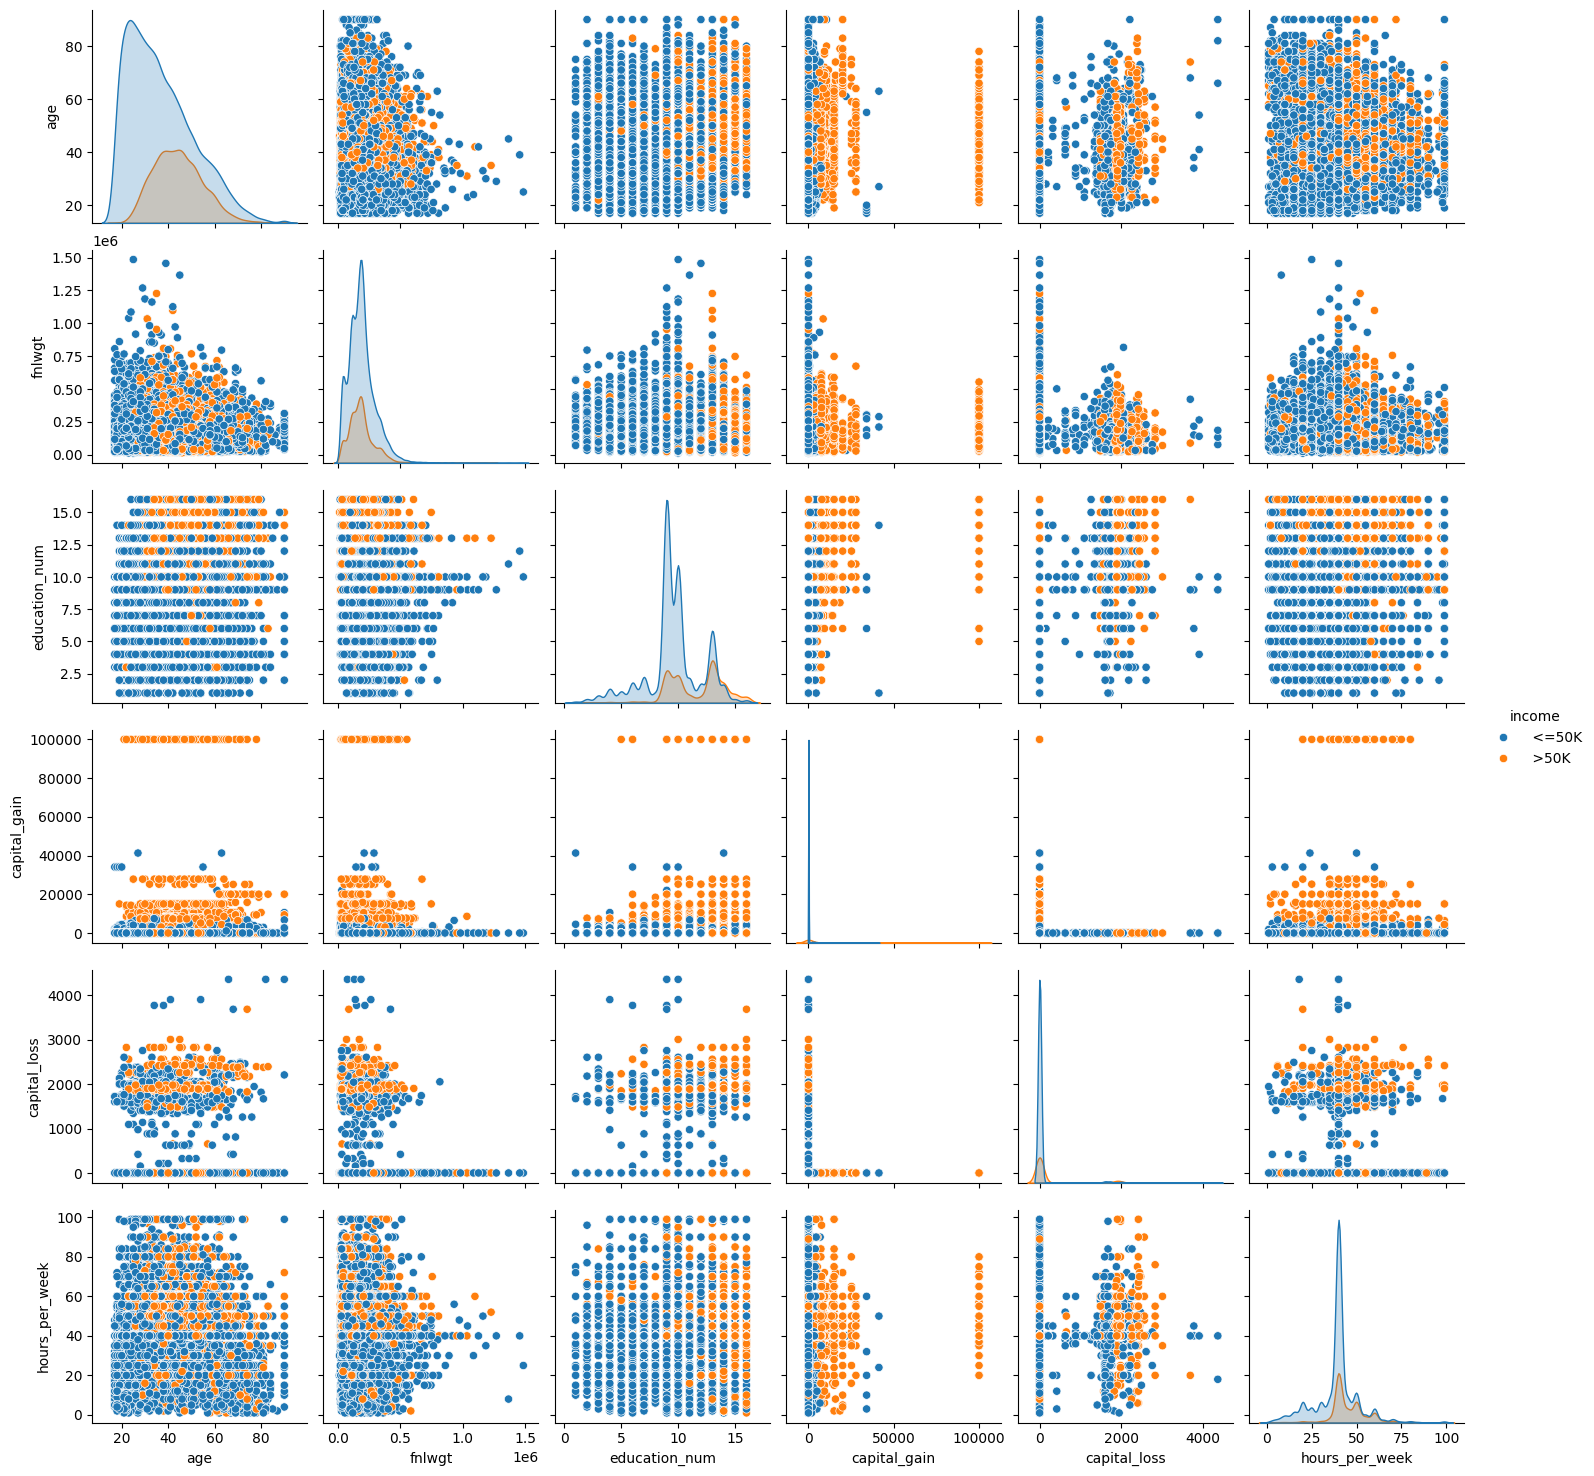

In [15]:
# Use seaborn to produce a pairplot
sns.pairplot(df, hue="income")
plt.show()

### 2.7 Categorical Variable Exploration

Transitioning from numerical to categorical variables, this section aims to dissect the composition of our categorical features. By analyzing the number of unique categories within each and visualizing their distribution, we gain valuable insights into the dataset's structure. This exploration helps in identifying dominant categories, potential imbalances, and informs us on how categorical data could influence our target variable, paving the way for informed encoding and feature engineering decisions.

In [16]:
# Identify and list all categorical features
categorical_features = df.select_dtypes(include='object').columns
categorical_features

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [17]:
# Find how many categorical features there are
print('There are {len(categorical_features)} categorical features')

There are {len(categorical_features)} categorical features


In [18]:
# Count the number of unique categories per categorical feature
for col in categorical_features:
    print("The number of categories in '{}' are {}.".format(col, len(df[col].unique())))

The number of categories in 'workclass' are 9.
The number of categories in 'education' are 16.
The number of categories in 'marital_status' are 7.
The number of categories in 'occupation' are 15.
The number of categories in 'relationship' are 6.
The number of categories in 'race' are 5.
The number of categories in 'sex' are 2.
The number of categories in 'native_country' are 42.
The number of categories in 'income' are 2.


In [19]:
# Display the first few rows for categorical variables to preview their values
df[categorical_features].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [20]:
# Calculate and display the proportion of each category per categorical feature
for col in categorical_features: 
    print(df[col].value_counts(normalize=True), '\n')

workclass
 Private             0.696837
 Self-emp-not-inc    0.078065
 Local-gov           0.064327
 ?                   0.056428
 State-gov           0.039893
 Self-emp-inc        0.034299
 Federal-gov         0.029505
 Without-pay         0.000430
 Never-worked        0.000215
Name: proportion, dtype: float64 

education
 HS-grad         0.322525
 Some-college    0.223807
 Bachelors       0.164520
 Masters         0.052924
 Assoc-voc       0.042475
 11th            0.036113
 Assoc-acdm      0.032793
 10th            0.028675
 7th-8th         0.019824
 Prof-school     0.017703
 9th             0.015797
 12th            0.013308
 Doctorate       0.012693
 5th-6th         0.010204
 1st-4th         0.005102
 Preschool       0.001537
Name: proportion, dtype: float64 

marital_status
 Married-civ-spouse       0.460092
 Never-married            0.327842
 Divorced                 0.136491
 Separated                0.031503
 Widowed                  0.030519
 Married-spouse-absent    0.012847

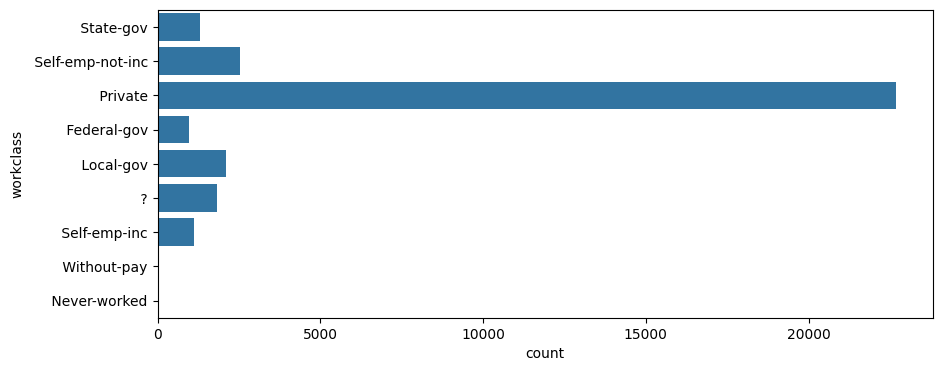

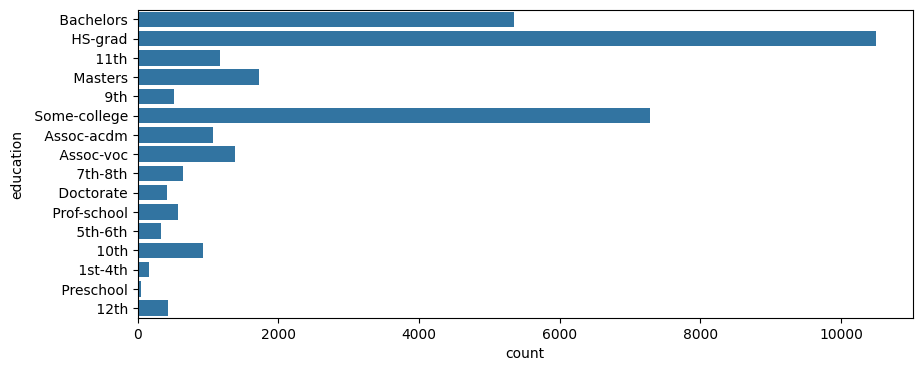

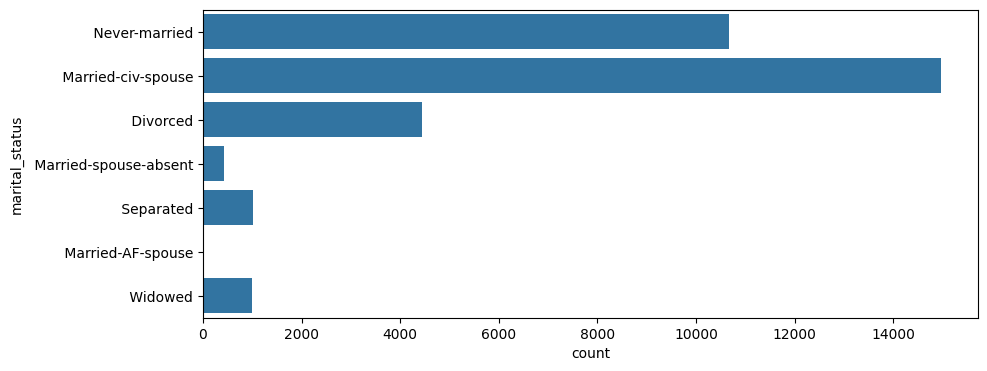

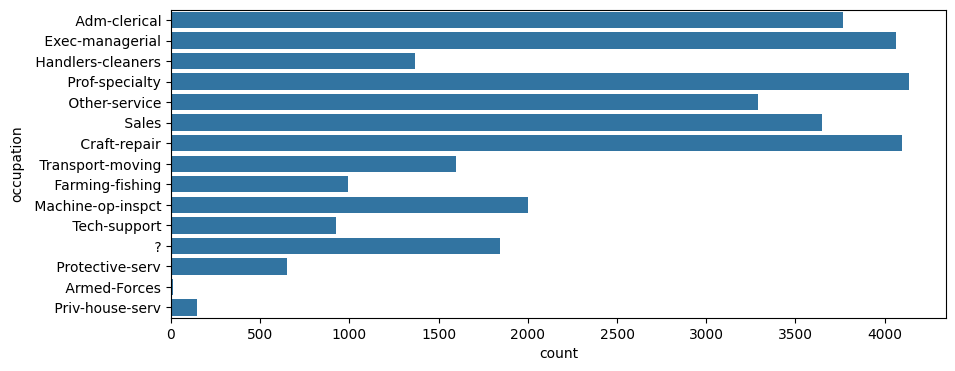

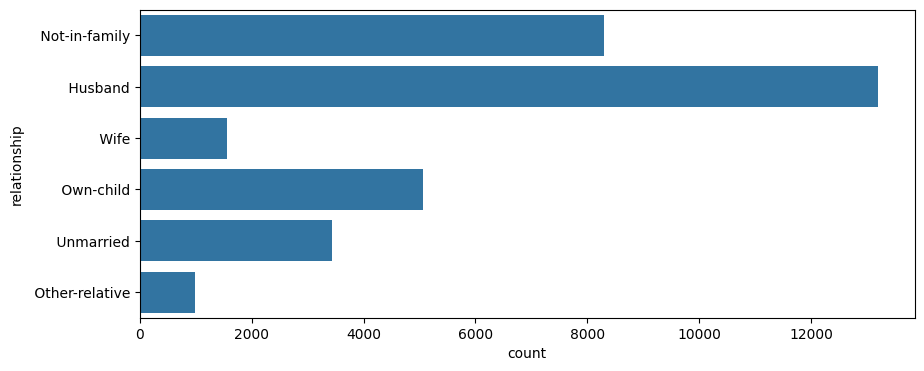

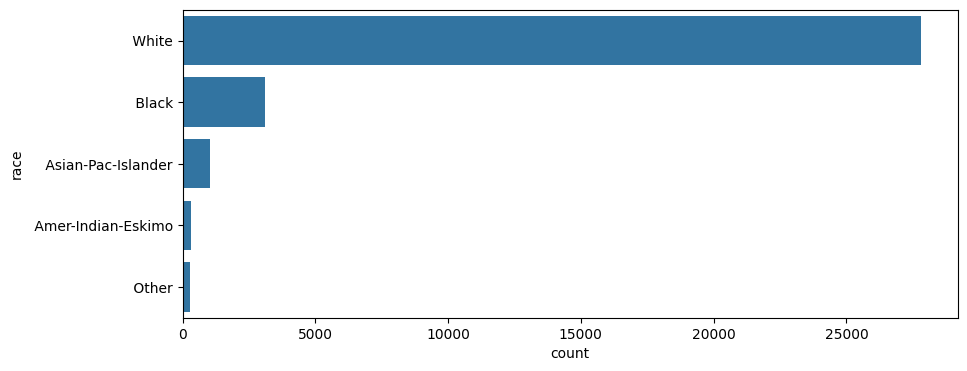

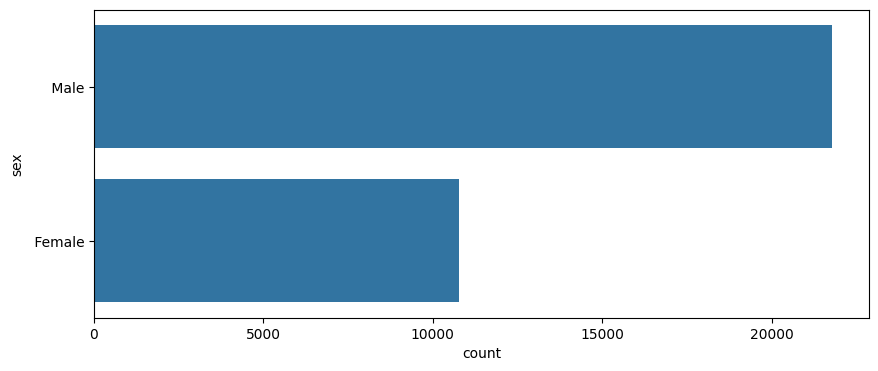

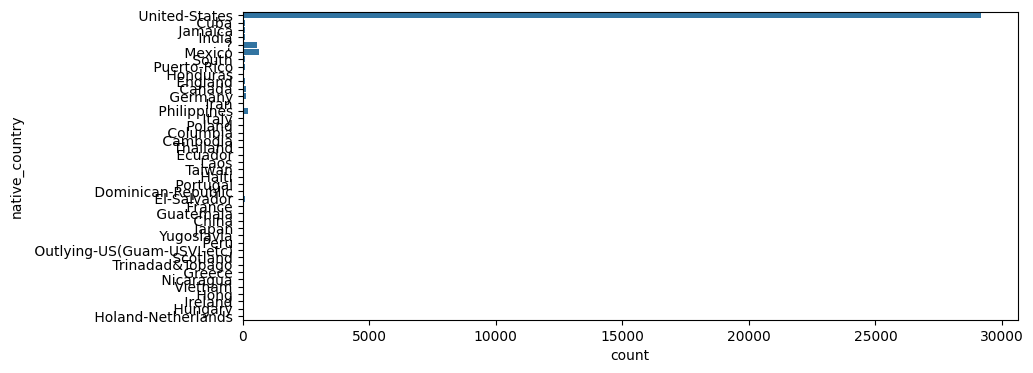

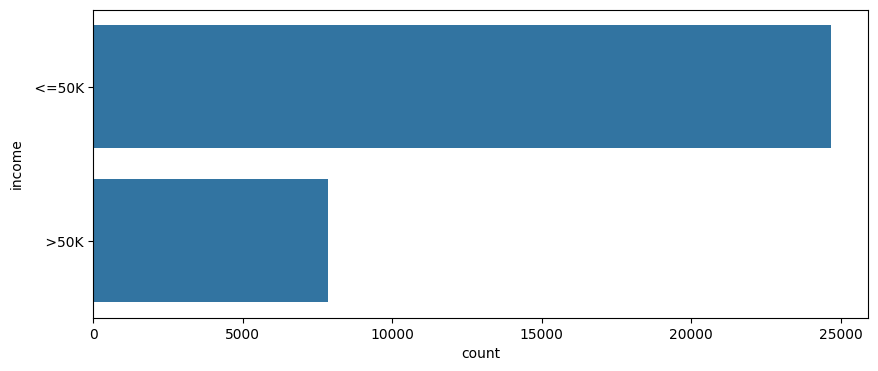

In [21]:
# Visualize the distribution of categories for each categorical variable
for column in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=column, data=df)
    plt.show()

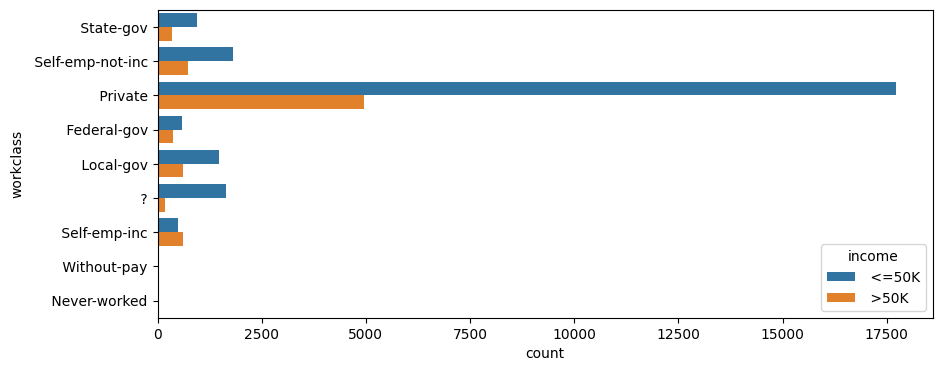

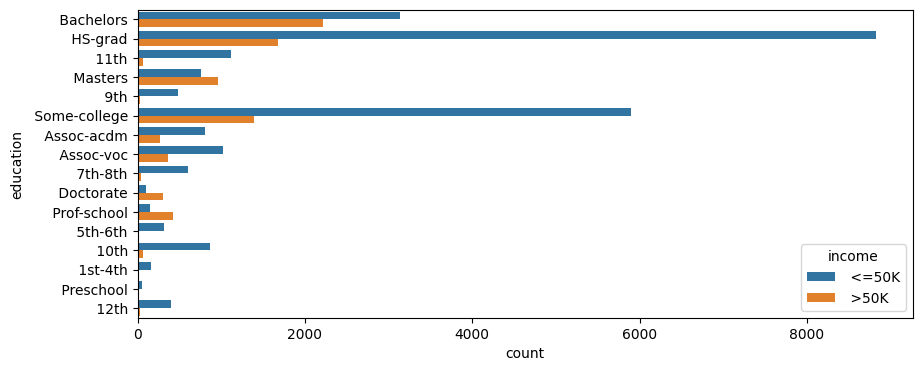

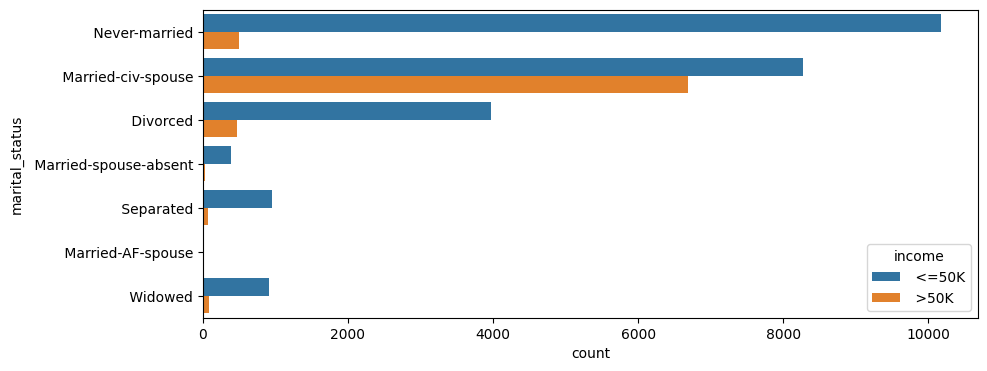

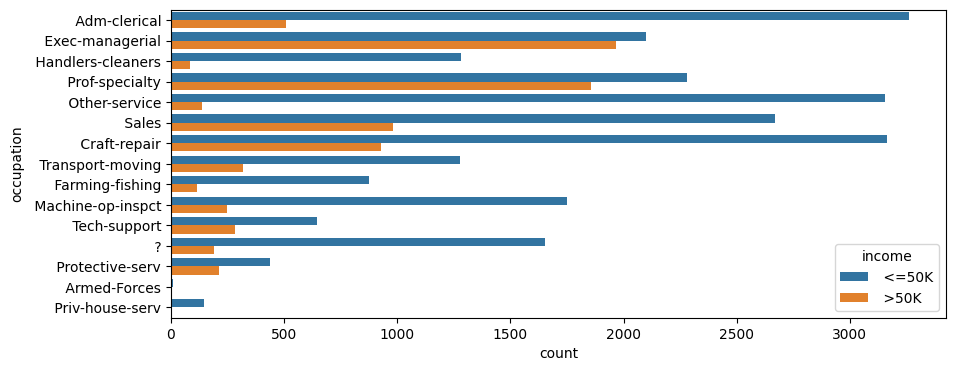

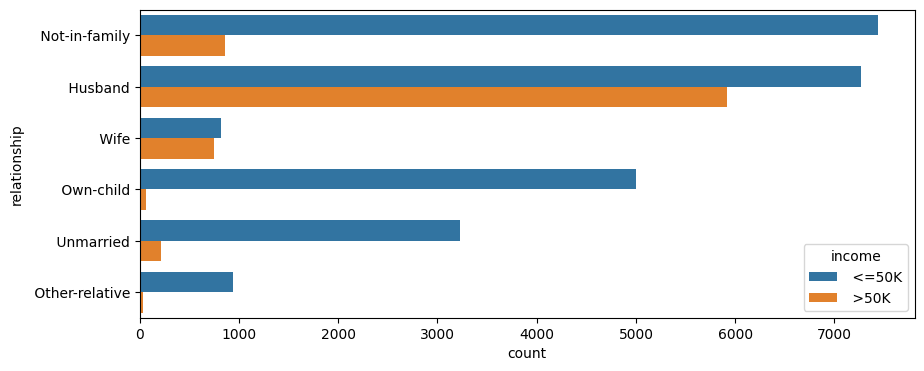

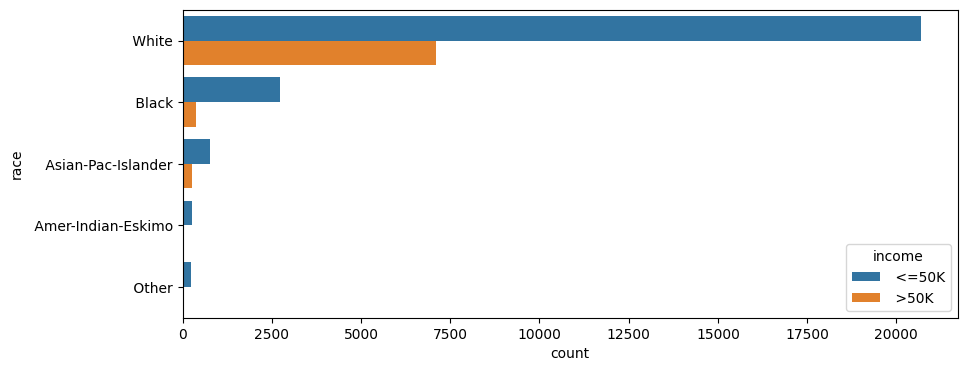

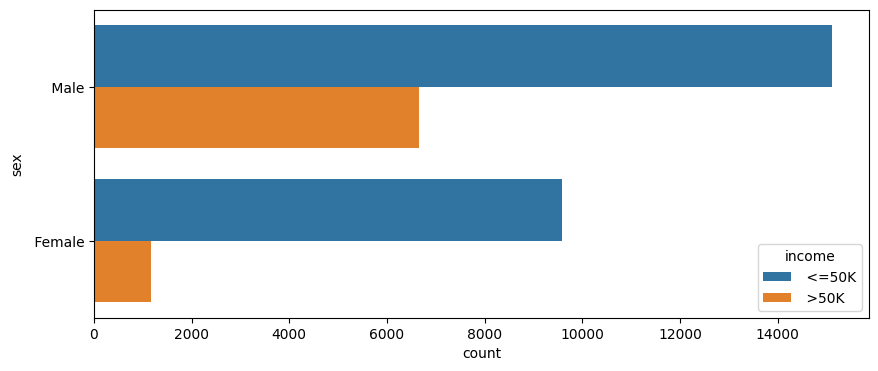

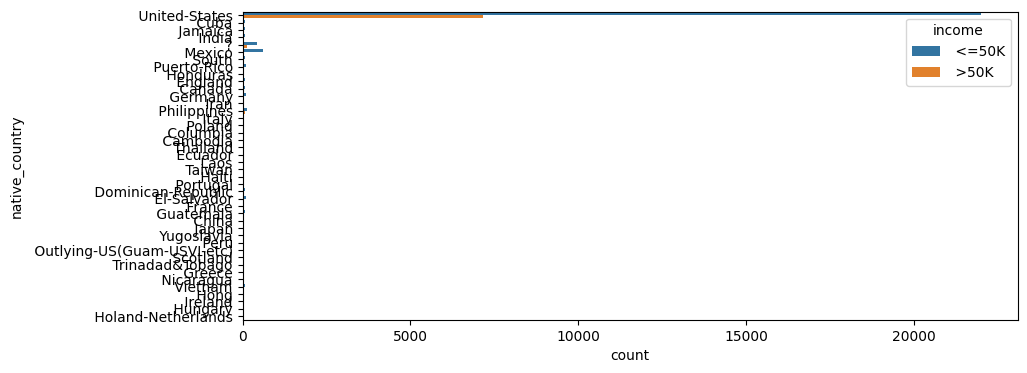

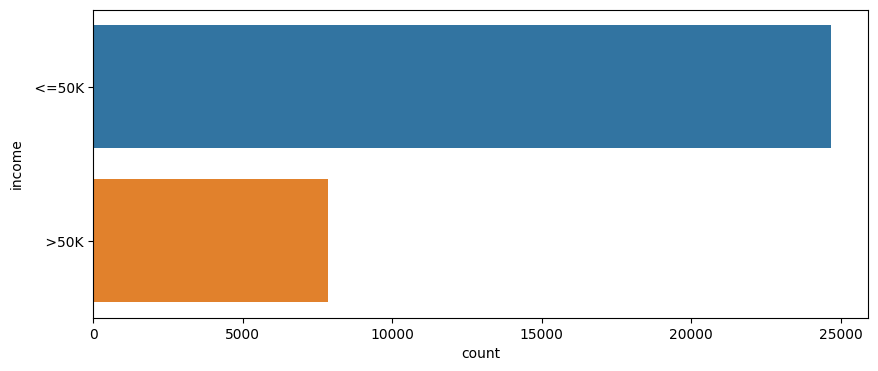

In [22]:
# Visualize category distributions with income as a hue to examine relationships
for column in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=column, hue='income', data=df)
    plt.show()

### 2.8 Target Variable Exploration

Understanding our target variable is pivotal in guiding our predictive modeling. We are going to explore the distribution of income levels (i.e. our target variable) to get a better sense of the income breakdown in the dataset. A pie chart further illustrates this distribution, providing a clear visual representation of the proportion of individuals. This exploration is key in anticipating modeling challenges, such as class imbalance.

In [23]:
# Count the occurrences of each class in the target variable
df['income'].value_counts()

income
 <=50K    24698
 >50K      7839
Name: count, dtype: int64

In [24]:
# Calculate the proportion of each class in the target variable
df['income'].value_counts(1)

income
 <=50K    0.759074
 >50K     0.240926
Name: proportion, dtype: float64

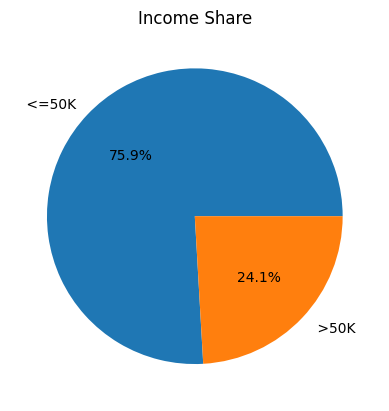

In [25]:
# Visualize the distribution of the target variable using a pie chart
fig = plt.figure()
df['income'].value_counts().plot.pie(explode=[0,0], autopct='%1.1f%%')
plt.title('Income Share')
plt.ylabel('');

### 2.9 Correlations

Finally, we examine the correlations between numerical variables to identify potential relationships that could inform our model building.


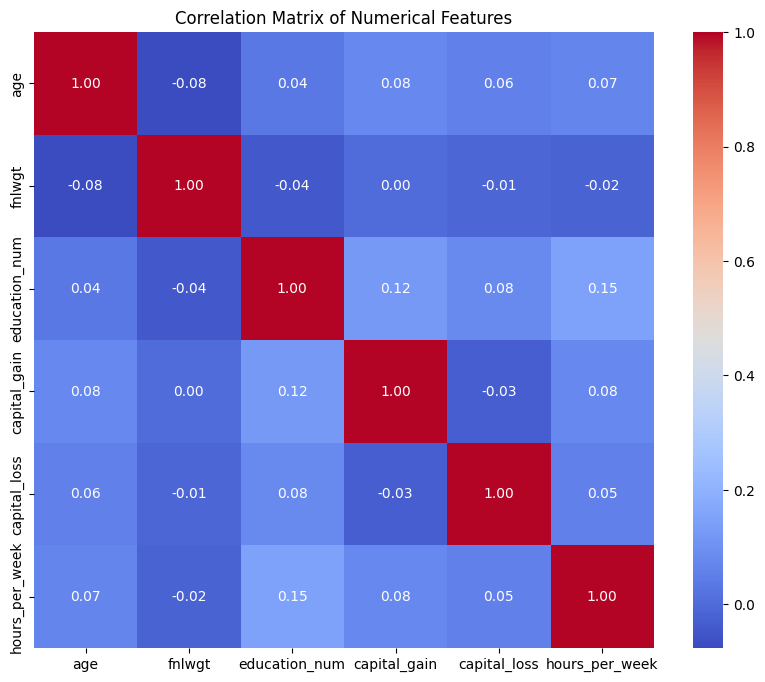

In [26]:
# Generate and visualize the correlation matrix for numerical features to identify relationships
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

## 3. Data Preprocessing and Feature Engineering

### 3.1 Handle Missing Values in Categorical Variables

First, we address missing values in categorical variables, specifically those represented as "?". This involves converting "?" to NaN for explicit handling and then removing any rows with these newly identified missing values.

In [27]:
# Convert "?" to NaN in the entire DataFrame
df.replace('?', np.nan, inplace=True)

# Remove rows with any NaN values in the DataFrame
df.dropna(inplace=True)

### 3.2 Group Rare Categories in Categorical Variables

Rare categories in categorical variables are grouped together into a new category. This is beneficial as it reduces the model's complexity and helps to prevent overfitting on sparse data.

In [28]:
# Group categories occurring less than 1% into an 'Other' category
for col in categorical_features:
    # Calculate the frequency of each category
    frequency = df[col].value_counts(normalize=True)
    # Identify rare categories that make up less than 1% of the data
    rare_categories = frequency[frequency < 0.01].index
    # Replace rare categories with 'Other'
    df[col] = df[col].replace(rare_categories, 'Other')

### 3.3 Feature Engineering

Feature engineering allows us to introduce new insights into our dataset. By combining capital_gain and capital_loss into a single capital_income feature, we gain a more nuanced understanding of an individual's financial status. This engineered feature could potentially enhance our model's predictive capability by offering a consolidated view of capital changes.

In [29]:
# Create a new feature capital_income by subtracting capital losses from gains
df['capital_income'] = df['capital_gain'] - df['capital_loss']

### 3.4 Reformat the Target Variable

Reformatting the target variable is a necessary step in preparing our data for modeling. Here, we convert the 'income' variable into a binary format, facilitating its use in binary classification tasks. 

In [30]:
# Convert the income variable into a binary format for classification
df['income'] = df['income'].map({' >50K': 1, ' <=50K': 0})

### 3.5 One-Hot Encoding

One-hot encoding converts categorical variables into a form that could be provided to ML algorithms to do a better job in prediction. We use Pandas' get_dummies function for this task, which converts each category value into a new binary variable (0 or 1).

After encoding, we drop one of the binary variables for each original categorical variable to avoid multicollinearity, which can negatively impact model performance.

In [31]:
# Apply one-hot encoding and drop the first to avoid multicollinearity
df_encoded = pd.get_dummies(df, drop_first=True)

### 3.6 Split the Data into Training and Testing Sets

The final step in our preprocessing phase is to split our dataset into training and testing sets. This division is vital for evaluating model performance in an unbiased manner, ensuring that our model can generalize well to unseen data. 

In [32]:
# Get the feature matrix (X) and target vector (y)
X = df_encoded.drop(['income'], axis=1)
y = df_encoded[['income']]

# Splitting the dataset into the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Model Fitting

### 4.1 Introduction to Decision Trees

Think of a Decision Tree as a way to make decisions or predictions based on data, similar to how we make choices in everyday life. It's a popular method in machine learning used for sorting data into categories (classification) or predicting a value (regression). Its structure is like a tree, hence the name, making it easy to understand because it closely resembles decision-making processes in real life:

- **Root Node**: This is where we start. It represents the entire dataset, or the big question we're trying to answer.
- **Internal Nodes**: These nodes ask questions based on data attributes. Think of them as checkpoints that guide us to the answer.
- **Branches**: These are the possible answers to the questions asked at the internal nodes, leading us down different paths.
- **Leaf Nodes**: The final stops, which give us the decision or prediction we're looking for.

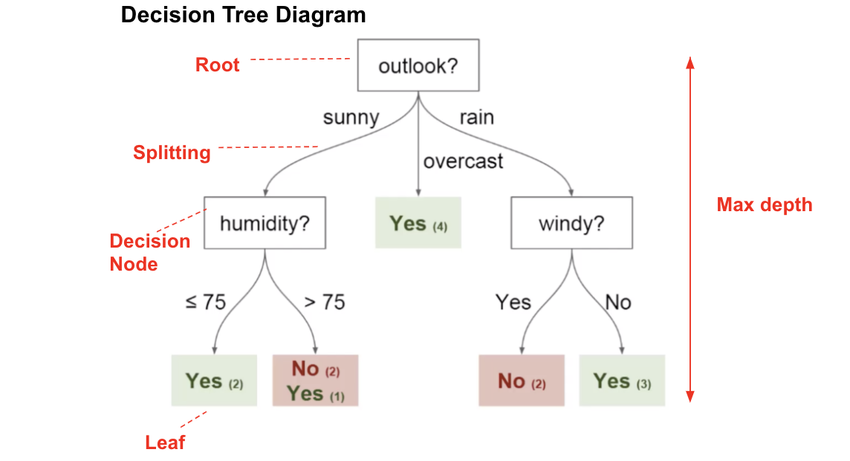

**Key Concepts**:
- The decision process begins with the entire dataset at the root.
- We prefer data attributes to be in clear categories, but if they're not, we make them so.
- As we move from the root to the leaves, we split the data based on attributes to make our decision/prediction as accurate as possible.
- We choose where to split the data using statistical methods, aiming for groups that are as pure (similar) as possible.

**Terminology Recap**:
- **Root Node**: Starting point.
- **Splitting**: Cutting the dataset into pieces based on certain rules.
- **Decision Node**: A point where the dataset is split.
- **Leaf/Terminal Node**: The final answer.
- **Branch/Sub-Tree**: A section of the decision-making process.
- **Parent and Child Node**: When one node leads to another, the first is the parent and the second is the child.

### 4.2 The Decision Tree Algorithm Simplified

The Decision Tree works by:

1. Putting the most critical question or attribute at the start (root node) because it gives us the best starting point for splitting our data.
2. Depending on the answer to that question, we move through the tree, asking more questions (internal nodes) and following the paths (branches) they lead us on.
3. We keep going until we reach an end point (leaf node) that gives us our final decision or prediction.

### 4.3 Understanding the Gini Index

The Gini Index helps us decide how to split the data at each step so that our groups are as pure as possible, meaning the data within each group is similar. A lower Gini Index means we're doing a good job of this:

1. For each group we might split our data into, we calculate its Gini Index, which tells us how mixed or pure it is.
2. We then calculate the Gini Index for the split, looking at all the groups together, to find out how good the split is overall.

We choose the split that gives us the most purity (lowest Gini Index), which helps make our Decision Tree as accurate as possible.

### 4.4 Fitting a Decision Tree Classifier

Now, we'll proceed with fitting a Decision Tree model using the Gini index and evaluate its performance. This involves initializing the model and fitting it to the training data.

In [33]:
# Initialize the Decision Tree Classifier with Gini index and a max depth of 2
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=42)

# Fit the Decision Tree Classifier
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

### 4.5 Predicting with a Decision Tree Classifier

With the model trained, we utilize it to make predictions on our test dataset. These predictions will later be evaluated to determine the model's accuracy and performance.

In [34]:
# Get the model predictions on the test set
y_pred = dt_clf.predict(X_test)

### 4.6 Visualizing a Decision Tree
Visualizing the Decision Tree allows us to comprehend the model's decision-making process. This visualization illustrates how the model makes predictions, showing the splits made at each node down to the predictions at the leaf nodes.

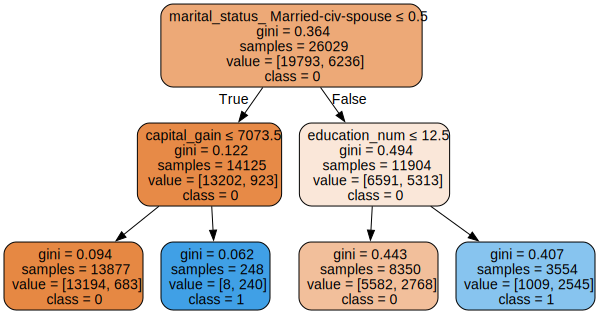

In [35]:
# Generate and visualize the dot data for this decision tree classifier
dot_data = tree.export_graphviz(dt_clf, 
                                out_file=None, 
                                feature_names=X_train.columns,  
                                class_names=['0', '1'],  
                                filled=True, 
                                rounded=True,  
                                special_characters=True)
graph = graphviz.Source(dot_data) 
graph

## 5. Model Evaluation

### 5.1 Calculating the Model Accuracy

Model accuracy is a key metric for evaluating the performance of our classifier, representing the proportion of correct predictions among all predictions made. It provides a straightforward initial assessment of how well our model performs.

In [36]:
# Calculating the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {test_accuracy:.2f}')

Test Accuracy: 0.83


### 5.2 Confusion matrix 

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of a classification model performance and the types of errors it will make. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. 



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class.


These four outcomes are summarized in a confusion matrix given below.


In [37]:
# Calculate the confusion matrix on the test set
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

Confusion matrix:
 [[4656  249]
 [ 874  729]]


<Axes: >

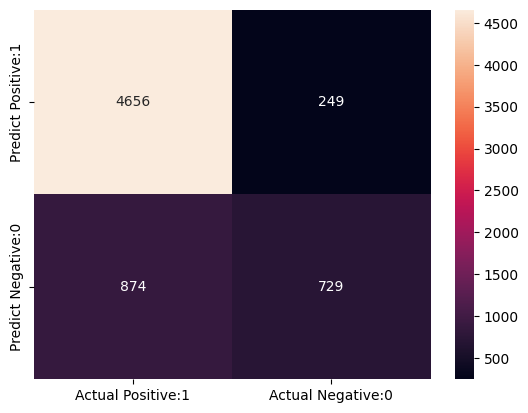

In [38]:
# Visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, 
                         columns=['Actual Positive:1', 'Actual Negative:0'], 
                         index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d')